<a href="https://colab.research.google.com/github/naoya1110/nitkc-ncku-ai-robotics/blob/main/Week03_sup_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supplemental material for Week03 to explain how the model parameters are updated with stochastic gradient decent (SGD).

In this example, we are going to implement a simple linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here we create a dataset of $x$ (input) and $y$ (output) with a simple linear equation below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

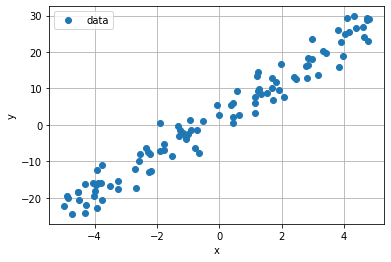

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=5.107, b=2.525


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

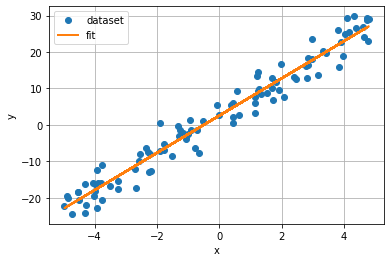

In [4]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [5]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` that predicts an output value of $y$ from an input value of $x$ with the parameters of $w$ and $b$.

In [6]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to calculate the mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This kind of function is called loss function which can be used for measuring how wrong the model prediction was.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [7]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what $w$ and $b$ are. So we initialize those values with arbitary numbers.

In [8]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now we can make a prediction using `model()`

In [9]:
p = model(x)
print(p)

tensor([-6.9090, -6.0654, -3.0937, -5.7917, -5.7115, -3.4717, -8.7601, -4.5679,
        -0.9026, -0.9544, -2.9302, -3.7497, -3.8395, -7.7006, -7.5426, -8.9182,
        -9.7162, -3.8657, -8.7676, -9.3101, -5.0809, -8.8078, -8.9749, -0.2524,
        -3.7611, -4.3712, -8.9369, -0.2295, -6.7696, -8.5229, -0.8283, -3.1773,
        -5.6613, -7.6688, -6.1523, -5.9351, -9.8551, -9.9706, -0.3591, -7.2883,
        -3.3032, -3.3153, -2.1373, -6.0786, -3.6610, -2.5942, -7.3536, -7.2526,
        -8.8964, -4.5438, -1.6691, -9.5263, -4.5637, -0.2657, -6.3248, -9.2647,
        -5.9228, -8.9456, -7.5606, -0.1998, -0.6116, -3.2620, -9.8923, -5.0013,
        -3.0208, -0.4007, -4.6110, -9.2969, -6.7807, -2.2253, -1.5715, -8.2570,
        -6.9024, -1.8255, -2.5232, -9.5375, -9.5042, -6.2998, -2.1795, -6.5042,
        -8.2633, -7.1963, -6.2495, -1.0211, -2.1607, -1.0974, -1.1929, -5.5332,
        -1.1467, -0.6900, -4.4267, -7.2282, -2.0079, -3.7284, -2.0079, -3.7968,
        -9.0650, -5.9944, -3.8666, -9.01

Let's visualize current prediction. As we set arbitary number for $w$ and $b$, the model prediction does not fit the data well for sure.

Text(0, 0.5, 'y')

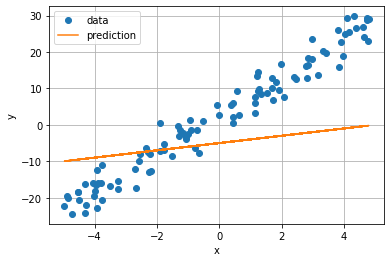

In [10]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [11]:
loss = loss_func(p, y)
print(loss)

tensor(208.6528, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss respect to current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients of $ \frac{\partial \mathrm{loss}}{\partial w}$ and $\frac{\partial \mathrm{loss}}{\partial b}$ can be accessed by `w.grad` and `b.grad`, respectively.

In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-71.4447)
tensor(-13.8626)


Then we can update $w$ and $b$ by using equations below where $\eta$ is learning rate. This is a method called stochastic gradient descent (SGD).

$\displaystyle w := w - \eta\frac{\partial \mathrm{loss}}{\partial w}$

$\displaystyle b := b - \eta\frac{\partial \mathrm{loss}}{\partial b}$


When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated at the beginning.

In [13]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values ($w$=5.0, $b$=3.0) than the initial values.

In [14]:
print(w)
print(b)

tensor(1.7144, requires_grad=True)
tensor(-4.8614, requires_grad=True)


In order to optimize $w$ and $b$ further, we repeat above process many times.

In [15]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate 
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w 
        b -= b.grad*lr        # update b
        
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=59.850, w=3.368, b=-0.936
Epoch 2, loss=47.135, w=3.669, b=-0.871
Epoch 3, loss=38.428, w=3.917, b=-0.808
Epoch 4, loss=32.426, w=4.121, b=-0.744
Epoch 5, loss=28.250, w=4.288, b=-0.682
Epoch 6, loss=25.311, w=4.426, b=-0.620
Epoch 7, loss=23.209, w=4.539, b=-0.559
Epoch 8, loss=21.676, w=4.632, b=-0.499
Epoch 9, loss=20.530, w=4.708, b=-0.440
Epoch 10, loss=19.651, w=4.771, b=-0.382
Epoch 11, loss=18.954, w=4.823, b=-0.325
Epoch 12, loss=18.386, w=4.866, b=-0.269
Epoch 13, loss=17.907, w=4.901, b=-0.213
Epoch 14, loss=17.492, w=4.930, b=-0.159
Epoch 15, loss=17.124, w=4.954, b=-0.106
Epoch 16, loss=16.791, w=4.974, b=-0.054
Epoch 17, loss=16.486, w=4.990, b=-0.003
Epoch 18, loss=16.201, w=5.004, b=0.048
Epoch 19, loss=15.934, w=5.015, b=0.097
Epoch 20, loss=15.682, w=5.025, b=0.145
Epoch 21, loss=15.443, w=5.033, b=0.192
Epoch 22, loss=15.215, w=5.039, b=0.239
Epoch 23, loss=14.998, w=5.045, b=0.284
Epoch 24, loss=14.790, w=5.050, b=0.329
Epoch 25, loss=14.591, w=5.054, 

Now you see $w$ is close to 5.0 and $b$ is close to 3.0.

Let's visualize how the loss value decreased.

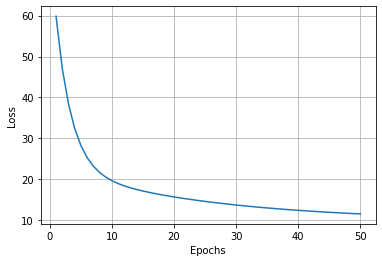

In [16]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

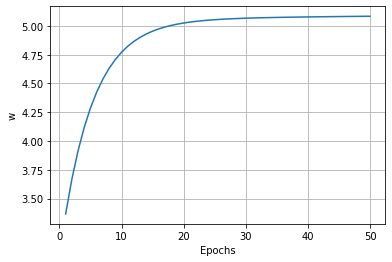

In [17]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

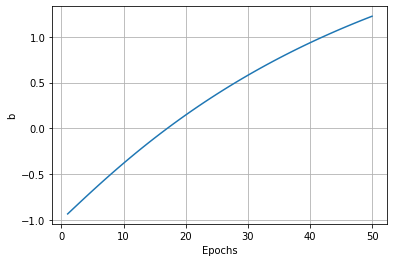

In [18]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Text(0, 0.5, 'y')

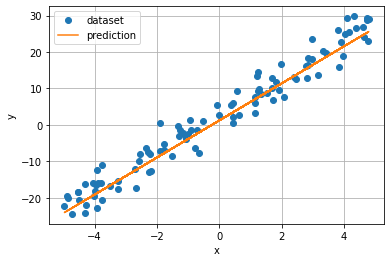

In [19]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.